# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Polynomial Regression with Advertising Dataset</p>

<div class="alert alert-block alert-info alert">  
    
## <span style ="color:#f2074e;">List of Contents

* **Inroduction**
* **Polynomial Regression**
* Scikit-Learn PolynomialFeatures
* Fit and Transform
* Train | Test Split
* Evaluation on the Test Set
* Comparison with the Simple Linear Regression
* **Bias-Variance Trade-Off: Overfitting vs Underfitting**
* Choosing a Model
* Finalizing Model Choice
* Saving Model and Converter
* Deployment and Predictions

## Introduction

In this notebook, I will analyze Advertising Dataset. The dataset has 3 independent variables: **TV, Radio, and Newspaper**. In this dataset, our dependent variable is **sales**.

I will use **Polynomial regression to predict sales** based on these three features. After finding **error metrics** (MAE, MSE, RMSE), I will compare then with the ones received from the Simple Linear Regression model. Finally, I will evaluate which model gives more accurate scores.

To see the Simple Linear Regression notebook, visit: https://github.com/msevim24/MachineLearning_DeepLearning_Projects/blob/master/Linear%20Regression_Advertising%20Data_Udemy.ipynb

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)

In [5]:
y = df["sales"]

# Polynomial Regression

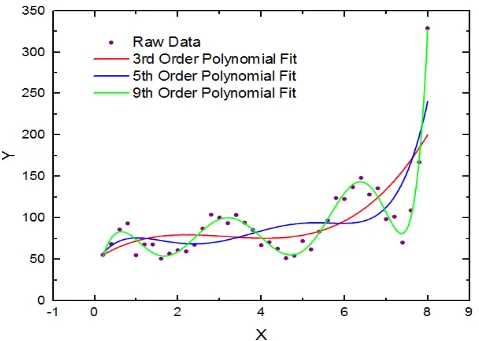

* Scikit-Learn's preprocessing library contains many useful tools to apply to the original dataset before model training.
* One tool is the **PolynomialFeatures** which automatically creates both higher order feature polynomials and the interaction terms between all feature combinations.
* **From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**We have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

## Scikit-Learn PolynomialFeatures

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# degree=2 is default degree
# by default "include_bias= True" but we did not add bias 
# to check the parameters use "shift + tab" inside the paranthesis

## Fit and Transform

In [8]:
polynomial_converter.fit(X) 

# We did not use X_train because it is not a machine learning model yet

PolynomialFeatures(include_bias=False)

In [9]:
# It is just X data that we want to transform
poly_features = polynomial_converter.transform(X)

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
# Instead,we can use the code below to "fit and transform" in one step
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

Converter "fits" to data, in this case, reads in every X column. Then it "transforms" and ouputs the new polynomial data

In [12]:
poly_features.shape # there are 9 features now

(200, 9)

In [13]:
# The third three values are coming from the original data. 
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [15]:
# In addition to these three values, we received new values, that is, interaction terms and square terms.
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [16]:
# An example of interaction term (multiply x1 and x2)
230.1*37.8

8697.779999999999

In [17]:
# multiply x1 and x3
230.1*69.2 

15922.92

In [18]:
# multiply x2 and x3
37.8*69.2 

2615.7599999999998

In [19]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

## Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# After "train_test_split" use shift+tab to see the code below from the documentation

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Instead of X, our new data is now "poly_features" because we have now 9 features (its shape: 200,9)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
# We changed the test_size ad random state

### Fit/Train the Model on the training data

Make sure **you only fit to the training data**, in order to fairly evaluate your model's performance on future data.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression() # default values

In [25]:
model.fit(X_train,y_train) # Fit only training data

# These X values are coming from poly_features, not from the original data

LinearRegression()

In [26]:
# Keep in your mind that we have 9 coefficients in new data
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Evaluation on the Test Set

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [27]:
test_predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test, test_predictions)

In [30]:
MSE= mean_squared_error(y_test, test_predictions)

In [31]:
RMSE = np.sqrt(MSE)

In [32]:
MAE

0.48967980448037096

In [33]:
RMSE 

# The difference between MAE and RMSE shows that there are some values way off from the general pattern

0.6646431757269152

In [34]:
# Let's check mean of the sales (y) to understand the erorr metrics better
df["sales"].mean()

14.0225

## Comparison with Simple Linear Regression



**Results on the Test Set (Note: Use the same Random Split )**

* Simple Linear Regression: (See the Linear Regression with Advertising Dataset notebook)
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree: (The error metrics in this notebook)
    * MAE: 0.4896
    * RMSE: 0.664
 
**Result:** Our Polynomial Regression Model performs better than the Simple Linear Regression Moodel.

---
# Bias-Variance Trade-Off: Overfitting vs Underfitting

* Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? **What trade-offs are we to consider as we increase model complexity?**
* In general, increasing model complexity in search of better performance leads to a **Bias-Variance trade-off**.
* Extreme bias or extreme variance both lead to bad models.
* **High bias means underfitting and high variance means overfitting**.
* **Overfitting:** The model fits too much to the noise and variance in the training data. This often results in **low error on training sets but high error on test/validation sets**. Therefore, the model will perform very well on trining databut have poor performance on new unseen data.
* **Underfitting:** Model does not capture the underlying trend of the data and does not fit the data well enough. So, there is **low variance but high bias**.Underfitting is often a result of an excessively simple model. **Underfitting can lead to poor performance in both training and testing data sets.**

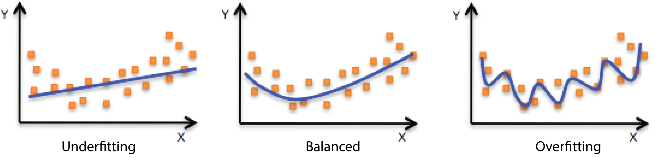

* **Overfitting vs Underfitting:** Overfitting can be harder to detect since good performance on training data could lead to a model that appears to be performing well.
* When thinking about **overfitting** and **underfitting** we shoudl keep in my mind **the relationship pf model performance on the training set versus the test/validation set**.

## Choosing a Model

### Adjusting Parameters

To detect underfitting and overfitting plot **error and model complexity on train and test set**.

When deciding optimal model complexity and wanting to fairly evaluate our model's performance, we can connsider both train error and test error to select an ideal complexity.

In case of Polynomial Regression, complexity directly relates to degree of the polynomial, but many machine learning algorithms have their own hyperparameters that can increase complexity.

It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [35]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10): # degrees from 1 to 10
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [36]:
# Let's check the erorrs

train_rmse_errors

# Notice that until the sixth value it decreases but then it increases

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388185]

In [37]:
 test_rmse_errors

# In test set, the errors increases after fourth value

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742648623355,
 2.575831205082368,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764142]

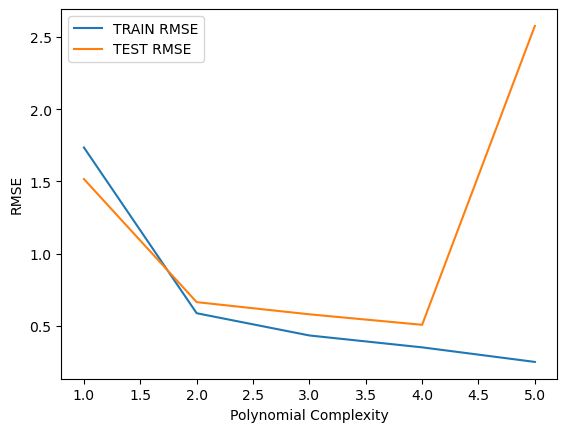

In [38]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend();

Around the 4, the Test RMSE explodes although the Train RMSE continues to decrease.

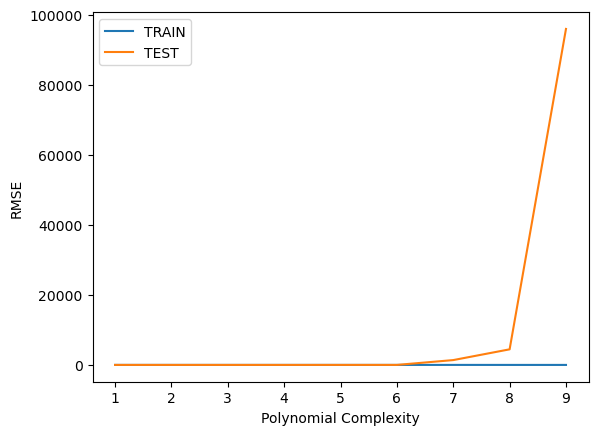

In [39]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend();

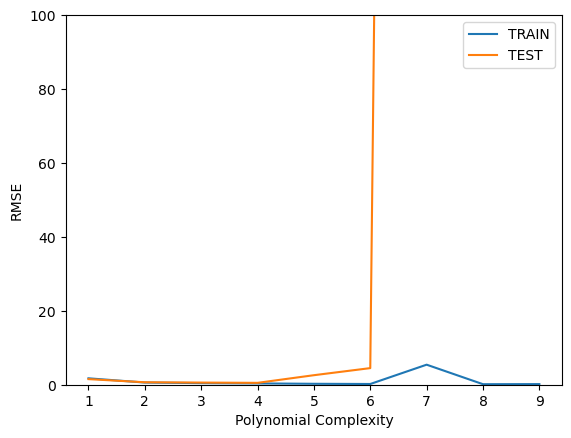

In [40]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend();

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself.

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

Based on our chart, could have also been degree=4, but it is better to be on the safe side of complexity. Therefore, we will chosse degree=3.

In [41]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
# Remember that by default "include_bias=True"

In [42]:
final_model = LinearRegression()

In [43]:
# Fit and transform
full_converted_X = final_poly_converter.fit_transform(X)

# fit the converted data (not the original data)
final_model.fit(full_converted_X,y)

LinearRegression()

## Saving Model and Converter

In [44]:
from joblib import dump, load

# "dump" is to save and "load" is to call it back for further predictions

In [45]:
# Save the "final_model"

dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [46]:
# Save the converter to use in case of need

dump(final_poly_converter, "final_converter.joblib")

['final_converter.joblib']

## Deployment and Predictions
Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

In [47]:
loaded_converter = load("final_converter.joblib")

In [48]:
loaded_model = load("final_poly_model.joblib")

**Prediction based on the new data:** Our next ad campaign will have a total spend of **149k on TV, 22k on Radio, and 12k on Newspaper Ads**, how many units could we expect to sell as a result of this?

In [49]:
campaign = [[149,22,12]]

Since there are three values here as in the original data has 3 features, we cannot use these values directy. We need to **convert it** because our Polynomial Model includes squared and intraction values.

In [50]:
transformed_data = loaded_converter.fit_transform(campaign) 

# It gives us all the squared and intreaction terms

In [51]:
transformed_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [52]:
# Check its shape
transformed_data.shape

(1, 19)

In [53]:
# Call the loaded model and predict this transformed data

loaded_model.predict(transformed_data)

# Our predicted sales...

array([14.64501014])